In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

print(pd.__version__)

2.0.0


In [2]:
dataset_path = r'dataset\Student_Performance.csv'

In [3]:
data_frame = pd.read_csv(dataset_path)
data_frame

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
data_frame.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Converting strings to numbers

In [5]:
def str_to_int(val):
    return 1 if val == 'Yes' else 0

In [6]:
data_frame['Extracurricular Activities'] = data_frame['Extracurricular Activities'].apply(str_to_int)

In [7]:
data_frame['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [8]:
data_frame.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [9]:
y = data_frame['Performance Index']
x = data_frame[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]

In [10]:
len(x),len(y)

(10000, 10000)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [12]:
len(x_train),len(y_train),len(x_test),len(y_test)

(8000, 8000, 2000, 2000)

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.coef_

array([2.85687593, 1.0196834 , 0.60277759, 0.4755706 , 0.19064653])

In [16]:
model.intercept_

-34.12447525412904

In [17]:
y_pred = model.predict(x_test)

In [18]:
x_test.shape

(2000, 5)

In [19]:
x_test_arr = np.array(x_test)
y_test_arr = np.array(y_test)

In [20]:
x_test_arr[:,0]

array([8, 7, 9, ..., 8, 8, 7], dtype=int64)

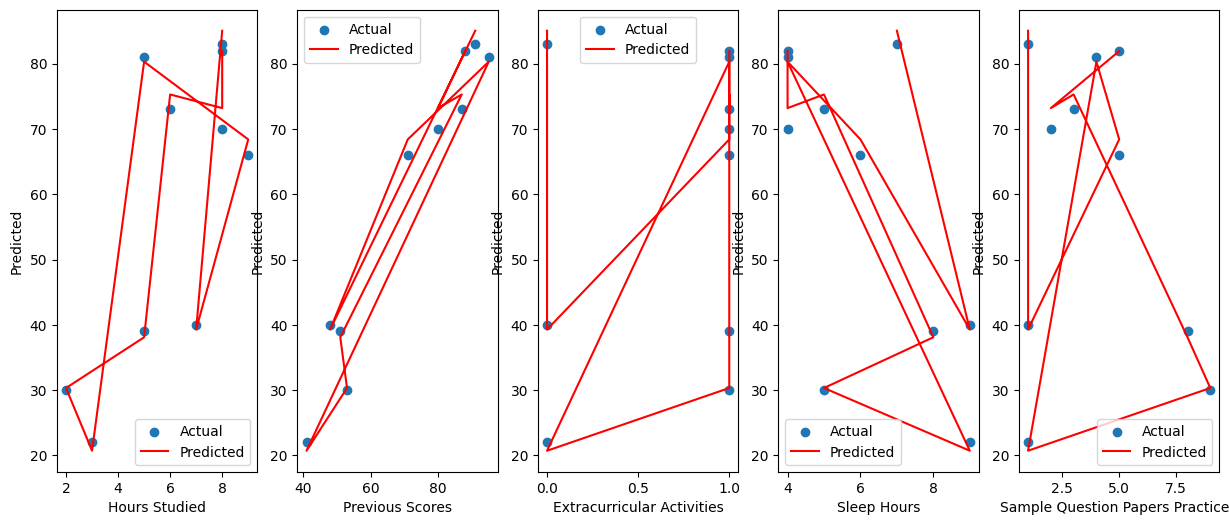

In [34]:
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
for i in range(5):
    axes[i].scatter(x_test_arr[:,i][:10], y_test[:10], label='Actual')
    axes[i].plot(x_test_arr[:,i][:10], y_pred[:10],color='red', label='Predicted')
    axes[i].set_xlabel(f'{features[i]}')
    axes[i].set_ylabel('Predicted')
    axes[i].legend()

In [22]:
error = mean_squared_error(y_test,y_pred)
error

4.024077481573182

In [23]:
for i,j in zip(y_test[:10],y_pred[:10]):
    print(f'True- {i}  Pred- {j:.3f}')

True- 83.0  Pred- 85.041
True- 40.0  Pred- 39.289
True- 66.0  Pred- 68.394
True- 81.0  Pred- 80.297
True- 22.0  Pred- 20.724
True- 30.0  Pred- 30.329
True- 39.0  Pred- 38.096
True- 73.0  Pred- 75.282
True- 70.0  Pred- 73.192
True- 82.0  Pred- 81.921


### Saving the model

In [24]:
with open('models\linear_regression.pkl','wb') as f:
    pkl.dump(model,f)

### Loading and predicting with inputs

In [25]:
with open('models\linear_regression.pkl','rb') as f:
    model = pkl.load(f)

In [26]:
y_pred = model.predict(x_test)

In [27]:
for i,j in zip(y_test[:10],y_pred[:10]):
    print(f'True- {i}  Pred- {j:.3f}')

True- 83.0  Pred- 85.041
True- 40.0  Pred- 39.289
True- 66.0  Pred- 68.394
True- 81.0  Pred- 80.297
True- 22.0  Pred- 20.724
True- 30.0  Pred- 30.329
True- 39.0  Pred- 38.096
True- 73.0  Pred- 75.282
True- 70.0  Pred- 73.192
True- 82.0  Pred- 81.921
